Data Reduction How-to
===

## Step-by-step Instruction

The <a href="https://github.com/neutrons/addie" target="_blank">ADDIE</a> software deployed on analysis will be used for the manual reduction for the total scattering data measured on SNS total scattering instruments (e.g., NOMAD and POWGEN). Multiple versions of ADDIE are available on analysis cluster, across the developing pipeline, from the nightly development version, the release candidate, to the production version. Normally, for general users, the production verison should be used, while the release candidate version is for the instrument team to test out the new implementation and the nightly development version is for developers. In ADDIE, there are two types of interface available -- one for the `autoNOM` approach of reducing the data and the other for the `MantidTotalScattering` framework. With the new implementation of `MantidTotalScattering` (as of writing, 05/27/2023), we strongly recommend users to use the new `MantidTotalScattering` framework for reducing their data. The instructions prsented in this book for data reduction will `ONLY` focus on the `MantidTotalScattering` interface.

1. To launch ADDIE, one should connect to the analysis cluster (<a href="https://analysis.sns.gov" target="_blank">https://analysis.sns.gov</a>) hosted at ORNL using their UCAMS account which should be created along with the user experiment by the IT support team. For the connection, one could use either a browser or <a href="https://www.cendio.com/thinlinc/download" target="_blank">ThinLinc</a>. Once logged in, launch a terminal from the applications inventory,

    <img src="../../imgs/analysis_term.png" alt="drawing" width="600"/>
    
    Then type in `addie` command to start the software. The default interface is `autoNOM` and to switch to the `MantidTotalScattering` interface, one should go to `File` $\rightarrow$ `Settings ...` from the menu to bring up the settings window, as shown below,

    <img src="../../imgs/addie_mts_switch.png" alt="drawing" width="800"/>

    where one can click on the `Mantid` radio button as shown in the image, to see the interface as shown below,
    
    <img src="../../imgs/addie_mts_main.png" alt="drawing" width="800"/>

2. From the main interface, right click anywhere in the large white space in the middle of the main window to bring up the context menu, where one has multiple options to populate and manipulate the table. To first populate the table, one has multiple options -- select a working directory, select an IPTS, load in previously saved JSON configuration file, or directly fetch information from the ONCAT database by logging in with UCAMS. The `select an IPTS` method is *recommended* whenever applicable since the manual input effort is the least, and we will start with it. In the right-click context menu, click on `Change to IPTS` and a window will pop-up to accept user input of the IPTS number (only integer number is acceptable as the input). Here, we will use the `IPTS-28922` as an example (so we need to input `28922` in the pop-up window) -- it is an IPTS for hosting all those instrument characterization runs and we have ever run a manual auto-reduction for a typical silicon measurement for the demo purpose.

    > N.B. For the `select an IPTS` method to work, it is required an auto-reduction has ever been run before (this is normally the case for a typical measurement) which will create an IPTS specific JSON file that needs to be loaded in when we select an IPTS.
    
    <img src="../../imgs/addie_c_ipts.png" alt="drawing" width="800"/>
    
    Once a valid IPTS is accpeted, ADDIE will search the relevant directory corresponding to the selected IPTS for the JSON file saved previously at the auto-reduction stage. If it can be found, ADDIE will load it in. If not, ADDIE will search for an alternative JSON file called `exp.json` which will be saved once a manual reduction is launched successfully. If valid JSON file can be identified and loaded in by ADDIE, the input table will be populated with the loaded JSON file, as shown below,
    
    <img src="../../imgs/addie_main_table.png" alt="drawing" width="800"/>
    
    Following the same searching mechanism as for the approach of `select an IPTS`, ADDIE also provides the way of populating the table by selecting a working directory. To do this, in the right-click context menu, one needs to select the `Change To Working Dir.` option,
    
    <img src="../../imgs/addie_c_wd.png" alt="drawing" width="800"/>
    
    followed by browsing into the intended working directory with the pop-up file explorer window. The same searching as detailed above (for the `select an IPTS` approach) will be applied, within the selected working directory. In fact, the `select an IPTS` appoach is just a convenient shortcut to the `select a working directory` approach since the working directory will be automatically set for a given IPTS, e.g., to `/SNS/NOM/IPTS-28922/shared/autoMTS`.
    
    > N.B. The instrument could be selected in the settings (`File` $\rightarrow$ `Settings ...`) from the instrument dropdown list -- currently `NOMAD` and `POWGEN` instruments are supported. The selection of instrument will determine the automatically set working directory when the `select an IPTS` approach is used.
    
    A third way of populating the table is to load in a previously saved JSON file and such a JSON file could be saved to and loaded from anywhere. Once the table is populated through whichever way, one can export the table as a JSON file and later on, the saved JSON file could be loaded in through this third approach. To export the populated table, one could refer to the following image,
    
    <img src="../../imgs/addie_export_table.png" alt="drawing" width="800"/>
    
    and to load in the saved JSON file, one refers to,
    
    <img src="../../imgs/addie_load_table.png" alt="drawing" width="800"/>
    
    Here, there are two options `Replace ...` or `Append ...` -- the former option is for replacing the already populated table with the loaded JSON file, and the latter one is to append the loaded JSON to the already populated table.
    
    The last option is to directly load in all the information from the ONCAT database. To do this, select `Table` $\rightarrow$ `Import from Database` $\rightarrow$ either `Replace ...` or `Append ...`, from thee right-click context menu. Once selected, the authentication window will pop up and we need to put in our UCAMS credentials to log in. Then one could either input (or select) an IPTS (see the red arrows in the image below),
    
    <img src="../../imgs/addie_db_ipts.png" alt="drawing" width="800"/>
    
    or input the run numbers,
    
    <img src="../../imgs/addie_db_run.png" alt="drawing" width="800"/>
    
    followed by clicking on the `Import All Runs` button,
    
    <img src="../../imgs/addie_db_import.png" alt="drawing" width="800"/>
    
    and the next pop-up window is for users to specify how they want to merge the individual runs, using the raw title or the raw title with the dynamic temperature removed. Usually, we should stay with the option of `raw title with dynamic temperature removed`. All the available options have their corresponding demo in the preview window so users can get an idea about what is expected to happen when making a certain selection,
    
    <img src="../../imgs/addie_merge_selection.png" alt="drawing" width="800"/>
    
    Using any of the options as detailed above, the input table could be populated. Users can manipulate the table by changing the relevant entries, add or remove rows, etc. and the details won't be covered here.
    
    > N.B. For demo purpose, one can use the first option by speciyfing the IPTS-28922 for populating the table. However, in case the directory is not accessible, one can instead use the JSON file as attached <a href="../../files/mts_input_demo.json" target="_blank" download>here</a> to follow the third way of populating the table -- download the JSON file using the browser within analysis to an accessible location on analysis and load it into ADDIE.
    
3. Next, we need to specify the calibration file used for the reduction. Following either the `select an IPTS` or `select a working directory` approach, the calibration file should have been populated automatically. In case we need to manually select a calibration file, we can click on the `Browse ...` button to select an H5 file saved from previously running calibration routine.

    <img src="../../imgs/addie_calib_select.png" alt="drawing" width="800"/>
    
    > N.B. Normally, the calibration file will be prepared automatically after running a calibrant (e.g., diamond) measurement. For the instrument team, in case it is needed to prepare the calibration file manually, click on the `Make ...` button to bring up the calibration preparation window. From there, information about the calibrant measurement could be entered and a calibration job could be launched to prepare the calibration file. Those entries should be self-explaining.
    
    <img src="../../imgs/addie_calib_make.png" alt="drawing" width="800"/>
    
4. For advanced users, clicking on the `Reduction Configuration ...` button (see the red arrow in the image below) to bring up the advanced reduction configuration window. Here, parameters for align & focus detectors, Fourier transform, and among other controls could be configured. One could refer to the two regions indicated by the red arrows for a typical setup (they are normally the only parameters that need to be configured),

    <img src="../../imgs/addie_red_config.png" alt="drawing" width="800"/>
    
    The `PDF` section configures the Fourier transform and the `Global Align and Focus Arguments` is for parameters concerning the align and focus. Refer to the Mantid documentation page about <a href="https://docs.mantidproject.org/nightly/algorithms/AlignAndFocusPowder-v1.html" target="_blank">AlignAndFocusPowder</a> for details about all those available parameters.

5. One final configuraiton is the output directory. By default, it will be set to the `output` directory (if not existing, ADDIE will create it) under the directory where ADDIE is launched. Depending on the method used for populating the table, the output directory will be set to different locations. If using the `select the working directory` method, the output directory will be set to the `output_DATE_INDEX` directory under the working directory -- `DATE` is the time stamp and `INDEX` is a minimum number that guarantees a non-existing output directory under the working directory. ADDIE will configure the output directory automatically in this case. With the `select an IPTS` approach, the output directory will be set in the same way and the only difference is the working directory is set automatically and specifically according to the selected IPTS, as detailed above in step-2. When using the `Import from Database` approach, the output directory will stay as default. To see or change the output directory, go to `File` $\rightarrow$ `Settings ...` from the menu,

    <img src="../../imgs/addie_s_out.png" alt="drawing" width="800"/>

    To change the output directory, click on the `Browse ...` button and select an intended output directory.
    
    > N.B. If one is using the `select an IPTS` method to select IPTS-28922 for populating the table, the output directory set by ADDIE automatically may not be accessible, in which case one needs to manually change the output directory to an accessible location.

6. Once all the configurations have been processed properly, it is time to run the data reduction by selecting `PDF` from the dropdown list (see the red arrow in the image below) followed by clicking on the `Run` button.

    <img src="../../imgs/addie_run.png" alt="drawing" width="800"/>
    
    The data reduction will be starting and jon monitor window will pop up with which one can monitor the progress of the reduction job and kill the job when needed, by hitting the `Abort` button,
    
    <img src="../../imgs/addie_running.png" alt="drawing" width="800"/>
    
7. The reduced data could be found under the output directory, with the structure as below,

    <img src="../../imgs/addie_out_fs.png" alt="drawing" width="100"/>

    where the `exp.json` file was saved automatically when running the table. All the other directories should be self-explaining by their names, containing reduced data in different format. The `SofQ` directory is worth mentioning -- it contains the reudced bank-by-bank normalized $S(Q)$ data (which should asymptotically approach 1 in the high-$Q$ region) in the NeXus format. The actual data will then need to be extracted and merged in the following step.
    
8. The main reason for reducing the data in a bank-by-bank manner is to use as much the high resolution bank as possible -- see <a href="../../auto_reduce/nomad_auto.html" target="_blank">here</a> for a bit more detailed discussion. However, with the data reduced to a bank-by-bank form, it can not be merged automatically to give the normalized $S(Q)$ pattern across the whole $Q$-range. In this case, manual efforts are needed to extract the bank-by-bank data, inspect the data, and select reasonable regions for each bank to merge into the final $S(Q)$ pattern. The principle here is to use as much the high-angle bank (on NOMAD, it is bank-5, which is the back-scattering bank with the nominal scatteirng angle of 154 degrees) as possibe. Also, ranges used for each bank should be connected seamlessly without gaps, and meanwhile, the conjunction $Q$ point in between two adjacent banks should be located in the flat region in betwene the Bragg peaks. ADDIE has a `Post Processing` tab for performing the banks merging task,

    <img src="../../imgs/addie_pp.png" alt="drawing" width="800"/>
    
    First, load in the reduced bank-by-bank $S(Q)$ data in NeXus format, by clicking on the `Load` button, followed by clicking on the `Extract` button to extract the bank-by-bank data. The extracted data will be shown in the `Raw Data` section in the `File List` panel,
    
    <img src="../../imgs/addie_pp_lef.png" alt="drawing" width="800"/>
    
    The extracted data will be saved into the `SofQ_merged` directory under the configured output directory of ADDIE. The next step is to specify the regions to be used for each bank to merge into the final $S(Q)$ pattern. To do this, fill in the region for each bank, together with the `Yoffset` and `Yscale` parameters (for offsetting and scaling each bank individually when necessary),
    
    <img src="../../imgs/addie_pp_merge.png" alt="drawing" width="800"/>
    
    At this step, one may need to visualize the extracted data for each bank to decide those input parameters. To do this, select the banks to visualize, right click and select `Plot` and the selected banks will be plotted in the panel on the left side,
    
    <img src="../../imgs/addie_pp_plot.png" alt="drawing" width="800"/>
    
    The populated parameters for all the banks can be exported to a JSON file by clicking on the `Save Config` button,
    
    <img src="../../imgs/addie_pp_msc.png" alt="drawing" width="800"/>
    
    and later the configuration can be loaded by clicking on the `Load Config` on top of the save button. For demo purpose, if one was using the `select an IPTS` method to select the IPTS-28922 for populating the table, the corresponding merge configuration file can be loaded from `/SNS/NOM/shared/test_data/MTS_auto_Test/Si_merge.json`. In case one cannot access the shared directory, the JSON file can be downloaded <a href="../../files/si_merge.json" target="_blank" download>here</a>. With all the parameters ready, click on the `Merge` button to merge the bank-by-bank data to an overall $S(Q)$ pattern -- the merged data will appear under `Merged Data` entry in the `File List` panel,
    
    <img src="../../imgs/addie_merged.png" alt="drawing" width="800"/>
    
    The merged data will be saved into the `SofQ_merged` directory under the configured output directory of ADDIE.
    
9. Once the merged $S(Q)$ data is ready, one can move forward to perform the Fourier transform to obtain the pair distribution function (PDF), using the embedded <a href="https://github.com/neutrons/pystog" target="_blank">`pystog`</a> utility. With ADDIE, the `pystog` processing can be conducted by putting in necessary parameters in the highlighted region of the `Post Processing` tab,

    <img src="../../imgs/addie_pystog.png" alt="drawing" width="800"/>
    
    Detailed introduction about all those input parameters concerning the `pystog` processing can be found <a href="./ts_pp.html" target="_blank">here</a> and won't be recovered in current instruction. For the demo purpose, if one is using the IPTS-28922 through out the demo, the attached JSON file <a href="../../files/si_pystog.json" target="_blank" download>here</a> can be imported by hitting the `Load Config` button,
    
    <img src="../../imgs/addie_pystog_lc.png" alt="drawing" width="800"/>
    
    > N.B. Alternatively, if one has access to `/SNS/NOM/shared/test_data/MTS_auto_Test/Si_pystog.json` on analysis, it can also be used.
    
    > The `rForm` parameter for `pystog` processing is not mentioned in the dedicated section for total scattering data post processing (see <a href="./ts_pp.html" target="_blank">here</a>). It is not so critical for the `pystog` processing since it only determines the format of the real-space function used in the intermediate steps. Usually, using the default $g(r)$ format should be working.
    
    Like what can be done for the merge configuration parameters, the inputs for `pystog` can also be exported by hitting the `Save Config` button next to the load button. When all parameters are ready, hitting the `StoG` button below the load and save buttons will run the `pystog` processing and usually after a few seconds, the processed data will appear in the `StoG Data` section of the `File List` panel,
    
    <img src="../../imgs/addie_pystog_fl.png" alt="drawing" width="800"/>
    
    The outcome of the `pystog` processing will be saved to the `StoG` directory under the configured output directory of ADDIE.
    
    In the list of generated files as shown above, the `NOM_Si_640d.sq` and `NOM_Si_640d.gr` is the scaled normalized $S(Q)$ data and its Fourier transform [in $g(r)$ format], respectively. The `NOM_Si_640d_ft.sq` and `NOM_Si_640d_ft.gr` is the same set of files as compared to above, but with the Fourier filter applied (see <a href="./ts_pp.html" target="_blank">here</a> for more information about Fourier filter). The `NOM_Si_640d_rmc.fq` and `NOM_Si_640d_rmc.gr` is the processed files ready for <a href="https://rmcprofile.ornl.gov" target="_blank">RMCProfile</a> (a typical package for performing the reverse Monte Carlo modeling for the total scattering data) modeling, and the data is in $F(Q)$ and $G(r)$ format (here the symbols being used are following the RMCProfile convention -- see the <a href="https://rmcprofile.ornl.gov/wp-content/uploads/2023/02/rmc-profile-manual.pdf" target="_blank">RMCProfile manual</a> for their defintions). The file `NOM_Si_640d_rmc_rr.gr` is the same $G(r)$ file as `NOM_Si_640d_rmc.gr`, but with the low-$r$ range garbage signal removed in a brutal force manner (i.e., by setting the data to the base line).
    
    > N.B. For all the generatd data involved in the step-8 & 9, one can go to the `File List` panel, select files under the same scope, right click to bring up the context menu and select `Save` to export the selected files to a location other than the automatically save location.
    
10. In step-8 & 9, both the bank merging configuration and the `pystog` processing can be saved to JSON files. Usually for the same sample measured in the same sample environment with the same experimental setup, the bank merging and `pystog` processing should be transferrable in between different set of measurements. This means once we successfully arrive at usable configurations for banks merging and `pystog` processing, we should be able to read in those saved configuration files and batch process other relevant runs without the need for manual processing. To do this, we need to go back to the `Processing` tab, select, e.g., `Merge` from the dropdown list, click on the `Run` button and browse into the previously saved banks mering confiugration JSON file to load in,

    <img src="../../imgs/addie_merge_batch.png" alt="drawing" width="800"/>
    
    Once the merge configuration file is selected, it will be loaded in and the banks merging operation will be conducted automatically for all the active rows -- see the check mark to the very left of each row,
    
    <img src="../../imgs/addie_merge_batch_active.png" alt="drawing" width="800"/>
    
    The merged data will be saved into a directory called `SofQ_merged`. Depending on different scenarios, the `SofQ_merged` directory will be put under different locations accordingly. The merging operation starts from the reduced NeXus file and ADDIE will sequentially search alternative locations for the existing NeXus file for each active row, and the search will stop once the reduced NeXus file (which should be with the stem name of the `Title` value of the active row) is found. The first searching directory is `SofQ` under the specified output directory (see `File` $\rightarrow$ `Settings`), and the second searching directory will be `/SNS/[Instrment_Name]/IPTS-[IPTS_Num]/shared/autoreduce/multi_banks_summed/SofQ`, where `[Instrument_Name]` is the short name of the selected instrument and `[IPTS-Num]` refers to the IPTS number corresponding to the runs to be processed. The `SofQ_merged` directory will be put alongside with whichever the first `SofQ` directory in which the reduced NeXus file will be found.
    
    Following the same procedure, one can perform the `pystog` processing in a batch manner, by selecting the `PyStoG` from the dropdown list,
    
    <img src="../../imgs/addie_pystog_batch.png" alt="drawing" width="800"/>
    
    and then repeat the steps as done for merging banks. The outcome of the `pystog` processing will be saved to the `StoG` directory and its parent directory will be configured in the same way as is for the merging operation detailed above.

## Demo Videos

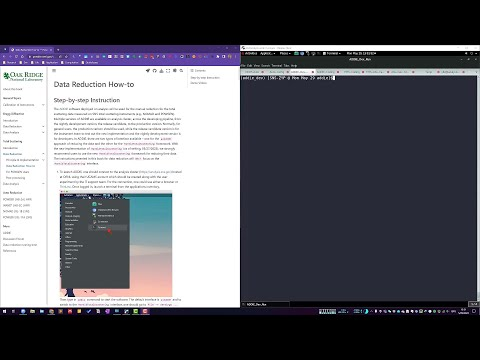

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Y0_v29DAgvw', width=720, height=500)

## Special Processing

### Texture Measurement

For texture measurement, we need to reduce the data into various groups according to the detector location, to track the variation of the scattering intensity in space, e.g., for building the `pole figure`. For such a need, one needs to manually prepare a grouping file in the XML format - `MantidWorkbench` can be used for creating and saving the grouping, using the [`CreateGroupingWorkspace`](https://docs.mantidproject.org/nightly/algorithms/CreateGroupingWorkspace-v1.html) and [`SaveDetectorsGrouping`](https://docs.mantidproject.org/nightly/algorithms/SaveDetectorsGrouping-v1.html) algorithm, respectively. Then we need to tell the reduction engine to use the prepared grouping file for reducing and outputing the data. One can set the grouping in the `ADDIE` reduction configuration, as shown below,

<img src="../../imgs/addie_red_config_grouping.png" alt="drawing" width="800"/>

The `Intermediate` grouping will be used for the data processing and the `Output` grouping will be used at the data output stage. Normally, they should stay the same, but in some rare cases, they can be different for the purpose of re-grouping detectors after processing (align and focus). If the reduction engine `mantidtotalscattering` is directly called from the command line, the following input JSON file can be used as a reference template,

```json
{
    "Facility": "SNS",
    "Instrument": "NOM",
    "Title": "NOM_texture_red_test",
    "Sample": {
        "Runs": "197077",
        "Background": {
            "Runs": "197073",
            "Background": {
                "Runs": "197073"
            }
        },
        "Material": "Si",
        "PackingFraction": 0.51,
        "Geometry": {
            "Shape": "Cylinder",
            "Radius": 0.295,
            "Height": 1.8
        },
        "AbsorptionCorrection": {
            "Type": "SampleOnly"
        },
        "MassDensity": 2.33
    },
    "Normalization": {
        "Runs": "197076",
        "Background": {
            "Runs": "197073"
        },
        "Material": "V",
        "PackingFraction": 1,
        "Geometry": {
            "Shape": "Cylinder",
            "Radius": 0.2925,
            "Height": 1.8
        },
        "AbsorptionCorrection": {
            "Type": "SampleOnly"
        },
        "MassDensity": 6.11
    },
    "Calibration": {
        "Filename": "/SNS/NOM/shared/autoreduce/calibration/NOMAD_196932_2024-07-18_shifter.h5"
    },
    "OutputDir": ".",
    "Merging": {
        "Grouping": {
            "Initial": "./NOM_Texture_Grouping.xml",
            "Output": "./NOM_Texture_Grouping.xml"
        },
        "QBinning": [
            0.01,
            0.005,
            40
        ]
    },
    "AlignAndFocusArgs": {
        "TMin": 300,
        "TMax": 20000
    }
}
```

```{admonition} ATTENTION
The `MantidTotalScattering` reduction engine is mostly configured and implemented with regard to the daily routines, by which we mean the data would normally be reduced into 6 banks according to the physical location of detectors. The absorption correction implementation is also entangled with the physical detector banks. For details about this, refer to <a href="./mts_abs_ms.html#performance-boost" target="_blank">Performance Boost for Absorption Correction</a>. Technically, some configuration and cache files can only work with the 6-physical-bank scheme. Therefore, to jump out of the daily routine, i.e., to make the `MantidTotalScattering` reduction routine to work with the manual group file, we need to do the following, 1) remove the grouping file located at `/SNS/NOM/shared/autoreduce/configs/abs_grouping.xml`; 2) make sure the `ReGenerateGrouping` entry in `/SNS/NOM/shared/autoreduce/auto_config.json` is set to `0`; 3) make sure all the cached absorption calculations are removed, `/SNS/NOM/IPTS-33585/shared/autoreduce/cache`, where `IPTS-33585` is the IPTS to work with.
```